#### Pyber Data Analysis
* Urban and Suburban cities constitutes most of rides,fare and driver count.
* Rural cities constitutes least of rides,fare and driver count.
* Urban drivers constitutes almost 81% of the driver count but only 62.7% of Total Fare.
* Suburban drivers constitutes 16.5% in driver count and 30.5% of Total Fare.

In [160]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
city_data.head()
ride_data.head()

# Combine the data into a single dataset
combined_data = pd.merge(ride_data,city_data, how='inner', on='city')

# Display the data table for preview
city_type = city_data["type"]
combined_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

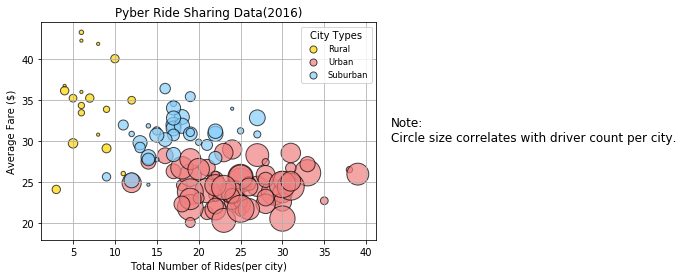

In [77]:
# Obtain the x and y coordinates for each of the three city types
comb_group = combined_data.groupby("city")
driver_count = comb_group["driver_count"].first()
city_type = comb_group["type"].first()
rides_per_city = comb_group["ride_id"].count()
avg_fare = comb_group["fare"].mean()
total_rides = comb_group["ride_id"].count()
df_comb = pd.DataFrame({"Average Fare ($) Per City" : avg_fare,
                    "Total Number of Rides Per City" : rides_per_city,
                    "Total Number of Drivers Per City" : driver_count,
                    "City Type" : city_type})

df_rural = df_comb[df_comb["City Type"]=="Rural"]
df_urban = df_comb[df_comb["City Type"] == "Urban"]
df_sub = df_comb[df_comb["City Type"] == "Suburban"]

# Build the scatter plots for each city types
# Incorporate the other graph properties
rural = plt.scatter(x = df_rural["Total Number of Rides Per City"],y = df_rural["Average Fare ($) Per City"],s=df_rural["Total Number of Drivers Per City"]*10,c = 'gold',edgecolors="black",alpha=0.7)
urban = plt.scatter(x = df_urban["Total Number of Rides Per City"],y = df_urban["Average Fare ($) Per City"],s=df_urban["Total Number of Drivers Per City"]*10,c = '#F08080',edgecolors="black",alpha = 0.7)
suburban = plt.scatter(x = df_sub["Total Number of Rides Per City"],y = df_sub["Average Fare ($) Per City"],s=df_sub["Total Number of Drivers Per City"]*10,c = '#87CEFA',edgecolors="black",alpha = 0.7)
plt.grid(True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides(per city)")
plt.title("Pyber Ride Sharing Data(2016)")

# Create a legend
#plt.legend(handles=[rural,urban,suburban], loc="best")
lgnd = plt.legend(labels = ('Rural','Urban','Suburban'),title ='City Types',fontsize='small', fancybox=True)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
textstr = 'Note:\nCircle size correlates with driver count per city.'
plt.text(43,30,textstr, fontsize=12)
# Save Figure
plt.savefig("Pyber2016.png")
# Show plot
plt.show()


## Total Fares by City Type

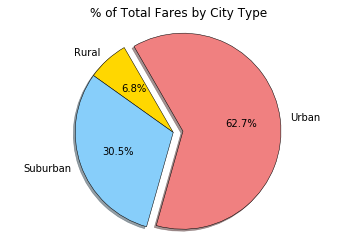

In [162]:
# color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
# city_color = {'Rural': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Urban': color_scheme['Light Coral']}

# Calculate Type Percents
comb_type = combined_data.groupby("type")
comb_type.count()
Total_fare = comb_type['fare'].sum()
Total_fare
# Build Pie Chart
labels = Total_fare.index
colors = [city_color[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(Total_fare, startangle = 120,colors = colors, explode = explode, labels = labels,autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Fares by City Type')
plt.axis('equal')
# Save Figure
plt.savefig("Pie_Total_Fare.png")
plt.show()

## Total Rides by City Type

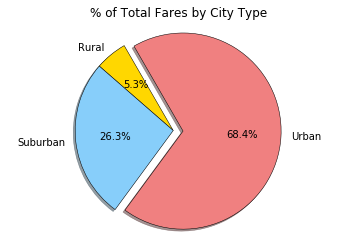

In [161]:
# Calculate Ride Percents
Total_ride = comb_type['ride_id'].count()
Total_ride
# Build Pie Chart
plt.pie(Total_ride, startangle = 120,colors = colors, explode = explode, labels = labels,autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Fares by City Type')
plt.axis('equal')
# Save Figure
plt.savefig("Pie_Total_Rides.png")
# Show Figure
plt.show()

## Total Drivers by City Type

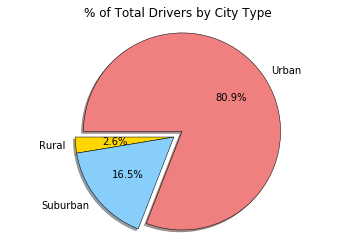

In [157]:
# Calculate Driver Percents
t = city_data.groupby('type').sum()
explode =[0,0,0.1]
# Build Pie Charts
plt.pie(t, startangle =-180 ,colors = colors, explode = explode, labels = labels,autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
# Show Figure
# Save Figure
plt.savefig("Pie_Total_Drivers.png")
plt.show()